# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

En el siguiente documento podran observar un proceso para la manipulación de datos del proyecto, el objetivo principal es identificar la información clave que pueda ser relevante para la empresa Megaline, por lo que será necesario:

- Cargar los datos
- Procesarlos (Limpieza, corrección y formateo de datos)
- Generar información relevante para la empresa.
- Crear graficos que enriquezcan los datos.
- Analizar los resultados obtenidos
- Crear hipotesis

## Inicialización

In [54]:
# Cargaremos todas las librerias necesarias para el proyecto

import pandas as pd
import scipy.stats as st
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st

## Cargar datos

In [55]:
# Carga los archivos de datos en diferentes DataFrames

m_calls = pd.read_csv("D:\\Tripleten\\projects\\Project3\\megaline_calls.csv") #datos sobre llamadas
m_internet = pd.read_csv("D:\\Tripleten\\projects\\Project3\\megaline_internet.csv") #datos sobre sesiones web
m_messages = pd.read_csv("D:\\Tripleten\\projects\\Project3\\megaline_messages.csv") #datos sobre sms
m_plans = pd.read_csv("D:\\Tripleten\\projects\\Project3\\megaline_plans.csv") #datos sobre tarifas
m_users = pd.read_csv("D:\\Tripleten\\projects\\Project3\\megaline_users.csv") #datos sobre usuarios

## Preparar los datos

Para cada una de las bases procederemos a realizar los pasos antes mencionados limpieza, corrección y formateo de datos

## Tarifas

In [56]:
m_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [57]:
m_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La información es correcta, sin embargo se manipulará la columna **mb_per_month_included** para poder trabajarla en Gigas

### Corregir los datos

Se transforman los megas a GB para poder usar el comparativo como lo piden en el proyecto

In [58]:
m_plans["mb_per_month_included"] = m_plans["mb_per_month_included"].astype(float)
m_plans["mb_per_month_included"] = m_plans["mb_per_month_included"].apply(lambda x: math.floor(x/1024))

In [59]:
m_plans["mb_per_month_included"] = m_plans["mb_per_month_included"].astype(int)
m_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


### Enriquecer los datos

Podemos pasar el plan name a dtype=Category

In [60]:
m_plans["plan_name"]= m_plans["plan_name"].astype("category") 
m_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      int64   
 1   mb_per_month_included  2 non-null      int32   
 2   minutes_included       2 non-null      int64   
 3   usd_monthly_pay        2 non-null      int64   
 4   usd_per_gb             2 non-null      int64   
 5   usd_per_message        2 non-null      float64 
 6   usd_per_minute         2 non-null      float64 
 7   plan_name              2 non-null      category
dtypes: category(1), float64(2), int32(1), int64(4)
memory usage: 362.0 bytes


## Usuarios/as

In [61]:
m_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Identificamos que la base cuenta con 500 filas, en donde churn_date tiene valores nulos, de acuerdo con la documentación previa al proyecto, estos valores nulos hacen referencia a que los usuarios siguen activos, no puedo rellenar esos valores debido a que deberían de encontrarse en un formato de datetime.

In [62]:
m_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,NaN
286,1286,Casie,Castaneda,52,"New Haven-Milford, CT MSA",2018-12-07,surf,NaN
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaN
254,1254,Billy,Webb,49,"Detroit-Warren-Dearborn, MI MSA",2018-08-03,surf,NaN
320,1320,Bert,Wells,23,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-02-23,surf,NaN


La columna reg_date debe cambiarse a formato datetime, procederé a corroborar:

- Los id's son únicos :  **Aprobado**
- Valores minimos y maximos de las edades : **Aprobado (18 a 75)**
- Agrupar por ciudades y visualizar posibles repeticiones por sintaxis: **Todo en orden**
- Modificar el reg_date a datetime y verificar coherencia de fechas (maximo, mínimo): **Los datos corresponden al periodo de ene-dic 2018**
- Verificar que solo existen dos planes (unique): **Comprobado**
<!-- - Informarme si es mejor dejar la fecha como null y solo filtrar por diferentes de null: **Decidí crear otra columna donde los usuarios se divirán en las categorías "Active" y "Inactive"** |No es funcional -->

## Corregir datos

In [63]:
m_users.duplicated().sum() #No hay duplicados generales (a total fila)
m_users["user_id"].nunique()  #Confirmamos que no hay errores de duplicidad
m_users["age"].min() #Valor minimo 18
m_users["age"].max() #Valor máximo 75

#Agruparé para corroborar que las ciudades estan OK
temp_df = m_users.groupby("city")["user_id"].count().reset_index().sort_values(by="city")
temp_df.head(60)
temp_df.tail(60)

#Modificamos el tipo de dato de reg_date
m_users["reg_date"]= pd.to_datetime(m_users["reg_date"], format="%Y-%m-%d")
# m_users.info() #Cambio realizado correctamente
m_users["reg_date"].min() #2018-01-01
m_users["reg_date"].max() #2018-12-31
m_users["plan"].unique() #Solo 2 planes

#Modificamos el tipo de dato de reg_date
m_users["churn_date"] = pd.to_datetime(m_users["churn_date"], format= "%Y-%m-%d")

m_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


El siguiente bloque fue documentado ya que no represento funcionalidad a la hora de la realización de analisis. Se mantiene por un posible futuro uso.

In [64]:
# #Creo una funcion para apply
# def rellenar(x):
#  if pd.isnull(x):
#     return "Active"
#  else:
#     return "Inactive"  
# 
#Segunda forma de hacerlo (mediante lambda)
# m_users["status"] = m_users["churn_date"].apply(lambda x: "Active" if pd.isnull(x) else "Inactive")
# m_users.groupby("status").count() #466 Active clients


In [65]:
m_users["churn_date"].isnull().sum() #corroboro con la base original 466 null (usuarios que todavía no dejaban el serivicio)

466

## Enriquecer los datos

Cambiaremos plan pasará al tipo "category"

In [66]:
m_users["plan"]= m_users["plan"].astype("category")
m_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB


## Llamadas

In [67]:
m_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [68]:
m_calls.sample(10)

,id,user_id,call_date,duration
43868,1159_464,1159,2018-09-19,13.99
35941,1136_70,1136,2018-12-12,6.30
83126,1301_40,1301,2018-12-29,5.82
65140,1236_430,1236,2018-04-18,0.00
67125,1240_983,1240,2018-11-30,4.65
117793,1412_77,1412,2018-10-16,3.14
108776,1384_98,1384,2018-08-04,0.00
61980,1223_142,1223,2018-07-15,0.00
125864,1445_279,1445,2018-05-06,0.00
78673,1281_389,1281,2018-09-15,16.10


Los datos parecen correctos, no hay valores nulos, y parece que la única modificación sería cambiar el tipo de dato de la serie call_date, sin embargo, procederé a: 

- Verificar que los id's de llamada sean únicos: **Confirmado**
- Verificar si se repiten user_id: **Confirmado**, hay valores repedidos, pero son esperados
- Pasar call_date a date_time: **Hecho**
- Verificar la duracion minima y maxima de la llamada: **min= 0 y max= 37.6**
- Redondear duration con ceiling() (Megaline redondea los segundos a minutos): **Hecho**

### Corregir los datos

In [69]:
m_calls["id"].nunique() #Todos los valores son únicos.
m_calls["user_id"].nunique() #Hay valores repedidos, pero son esperados

#Cambiamos call_date a tipo fecha
m_calls["call_date"]= pd.to_datetime(m_calls["call_date"], format="%Y-%m-%d")
m_calls.info() 

m_calls["duration"].min() #0
m_calls["duration"].max() #37.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


37.6

### Enriquecer los datos

Se procede a redondear hacia arriba "ceil()" la duración de la llamada. (Megaline redondea los segundos a minutos)

In [70]:
# m_calls["duration"] =m_calls["duration"].apply(lambda x: math.ceil(x)) #¿Que diferencia hay entre las librerías?
m_calls["duration"] =m_calls["duration"].apply(lambda x: int(np.ceil(x)))
m_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


El siguiente bloque extra se creó para verificar la coherencia de un código más abajo, la entrega mensual de duración incrementa por mes, pero quería descartar que el tema fuera un error de acumulación de datos. (Se descarta error)

In [71]:
# m_calls["month"] = m_calls["call_date"]
# m_calls["month"] = pd.to_datetime(m_calls["month"]).dt.month
# join = m_calls.merge(m_users,how="left", on="user_id")
# join.groupby(["plan",'month'] , observed=False)["duration"].sum().reset_index()

Conclusion: Me resulta muy extraño que el comportamiento mensual de la duración de las llamadas se incremente con més, sin embargo parece que es lo esperado

## Mensajes

In [72]:
m_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [73]:
m_messages.sample(10)

,id,user_id,message_date
52746,1336_782,1336,2018-08-10
24079,1144_585,1144,2018-12-03
71798,1467_130,1467,2018-10-23
68526,1444_9,1444,2018-09-21
52076,1336_10,1336,2018-10-02
44133,1293_945,1293,2018-12-23
4597,1043_1008,1043,2018-09-16
44137,1293_957,1293,2018-10-31
22719,1136_125,1136,2018-11-03
28089,1173_171,1173,2018-10-28


No hay valores ausentes, sin embargo necesitaremos cambiar la serie message_date a tipo datetime

### Corregir los datos

In [74]:
m_messages["message_date"]= pd.to_datetime(m_messages["message_date"], format= "%Y-%m-%d")
m_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

No hay valores para enriquecer los datos por ahora

## Internet

In [75]:
m_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [76]:
m_internet.sample(10)

,id,user_id,session_date,mb_used
38909,1174_172,1174,2018-11-08,386.17
59285,1267_87,1267,2018-12-29,136.14
72601,1337_85,1337,2018-11-11,64.39
80757,1377_182,1377,2018-08-15,485.22
12331,1060_40,1060,2018-12-19,81.48
86572,1402_101,1402,2018-10-12,0.00
69938,1327_78,1327,2018-12-05,506.97
40592,1182_285,1182,2018-12-24,371.48
26062,1122_17,1122,2018-12-17,457.70
73632,1346_213,1346,2018-08-28,0.00


Los datos estan en orden, pero la serie **session_date** no esta categorizada correctamente el tipo correcto, lo pasaremos a **datetime**

### Corregir los datos

In [77]:
m_internet["session_date"] = pd.to_datetime(m_internet["session_date"], format="%Y-%m-%d")
m_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

No hay factores por agregar ahora

## Estudiar las condiciones de las tarifas

In [78]:
m_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Procederemos a calcular el número de llamadas hechas por cada usuario al mes

In [79]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
m_calls["month"] = m_calls["call_date"].dt.month
calls_per_user = m_calls.groupby(["user_id","month"])["id"].count().reset_index() #Dato extra: 481 usuarios con 137735 llamadas totales totales, 
calls_per_user.rename(columns={"id":"calls"},inplace=True)
calls_per_user.head(10)

# m_calls[m_calls["user_id"]==1000] #Confirmado, comprobamos con uno de los valores / user id= 1000 tiene 16 llamadas
# m_calls[m_calls["duration"]==0] #Tenemos 26,834 llamadas que tuvieron una duración de 0 segundos. ¿Deberíamos contarlas como llamadas? (Se consideraron para el analisis)
# m_calls[~(m_calls["duration"]==0)]["duration"].min() #Según las instrucciones las llamadas de 0.1 segundos deberían ser tomadas como 1 minuto. (Solo informativo).

,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


Se calcula en el siguiente bloque la cantidad de minutos usados por cada usuario al mes.

In [80]:
minutes_per_user = m_calls.groupby(["user_id","month"])["duration"].sum().reset_index()
minutes_per_user.sort_values(by="user_id").head()


# m_calls[m_calls["user_id"]==1000] #Verifico que los datos coincidan tomando un usuario como ejemplo

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


Ahora calcularemos el número de mensajes enviados por cada usuario al mes

In [81]:
m_messages["month"]= m_messages["message_date"].dt.month
m_messages_per_user = m_messages.groupby(["user_id","month"])["id"].count().reset_index()
m_messages_per_user.rename(columns={"id":"n_messages"}, inplace=True)
m_messages_per_user.head()

# m_messages[m_messages["user_id"]==1000] #confirmando con un usuario que mi código sea coherente

,user_id,month,n_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


Tambíen será necesario calcular los GB consumidos por cada mes para cada usuario.

In [82]:
m_internet["month"]= m_internet["session_date"].dt.month
m_internet_per_user = m_internet.groupby(["user_id", "month"])["mb_used"].sum().reset_index()
m_internet_per_user.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


Esta fue mi primera versión para agregar como apply, pero encontre una lódica más facil (la coloco en el siguiente bloque)

In [83]:
# def to_megas(x): 
#     for i in range(0, 1000): #buscar como limitar este numero
#         if x > 0 and x < (i+1)*1000:
#             return (i+1)

# m_internet_per_user["megas"] = m_internet_per_user["mb_used"].apply(to_megas)
# m_internet_per_user

In [84]:
m_internet_per_user["megas"] = m_internet_per_user["mb_used"].apply(lambda x: math.ceil(x/1024))
m_internet_per_user.head(10)

,user_id,month,mb_used,megas
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
5,1001,12,19369.18,19
6,1002,10,6552.01,7
7,1002,11,19345.08,19
8,1002,12,14396.24,15
9,1003,12,27044.14,27


Procedemos a realizar las fusiones de los conjuntos de datos

Fusion de conjunto de llamadas y conjunto de minutos

In [85]:
m_fusion_1 = calls_per_user.merge(minutes_per_user, how='outer', left_on=["user_id", "month"], right_on=["user_id", "month"])
m_fusion_1.sample(10)

#Con las siguientes lineas corrobore que el código fuera coherente para la fussion de calls_per_user and minutes_per_user
# m_fusion_1[m_fusion["month"]==12]
# calls_per_user[calls_per_user["month"]==12]
# minutes_per_user[minutes_per_user["month"]==12]

,user_id,month,calls,duration
2251,1498,10,46,298
2017,1440,11,103,787
738,1157,12,68,508
1987,1434,12,58,410
2072,1456,12,62,425
1779,1390,9,91,692
1992,1436,8,15,111
789,1169,12,105,835
1908,1414,11,57,288
1079,1236,4,49,273


Fusion de conjunto de mensajes y conjunto de internet

In [86]:
m_fusion_2 = m_messages_per_user.merge(m_internet_per_user, how='outer', left_on=["user_id", "month"], right_on=["user_id", "month"])
m_fusion_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     2292 non-null   int64  
 1   month       2292 non-null   int32  
 2   n_messages  1806 non-null   float64
 3   mb_used     2277 non-null   float64
 4   megas       2277 non-null   float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 80.7 KB


Es razonable que tengamos valores nulos al realizar el outer join, ya que no todos los usuarios que enviaron mensajes usaron los megas y visceversa, se utilizarón las siguientes lineas para identificar que la tabla fuera coherente

In [87]:
#Con las siguientes lineas corrobore que el código fuera coherente para la fussion de calls_per_user and minutes_per_user,
# m_fusion_2[m_fusion2["month"]==12]
# m_internet_per_user[m_internet_per_user["month"]==12]
# m_messages_per_user[m_messages_per_user["month"]==12] #se obtienen los mismos valores que en la fusion

# m_fusion_2[m_fusion_2["mb_used"].isna()] #NaN esperados / Posibles usuarios que usaron mensajes pero no consumieron megas 
# m_fusion_2[m_fusion_2["n_messages"].isna()] #NaN esperados / Posibles usuarios que consumieron megas pero no mensajes

Fusion de conjunto de llamadas, mensajes, minutos e internet.

In [88]:
m_fusion = m_fusion_1.merge(m_fusion_2, how='outer', left_on=["user_id", "month"], right_on=["user_id", "month"])
m_fusion

,user_id,month,calls,duration,n_messages,mb_used,megas
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


Ahora procedemos a eliminar los valores Nulos y remplacarlos por 0 para las columnas "calls", "duration", "n_messages", "megas", descartaremos la columna mb_used

In [89]:
m_fusion= m_fusion[['user_id', 'month', 'calls', 'duration', 'n_messages', 'megas']]
m_fusion.fillna(0, inplace=True)
m_fusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     2293 non-null   int64  
 1   month       2293 non-null   int32  
 2   calls       2293 non-null   float64
 3   duration    2293 non-null   float64
 4   n_messages  2293 non-null   float64
 5   megas       2293 non-null   float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 98.7 KB


C:\Users\jm_he\AppData\Local\Temp\ipykernel_17584\3811685494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_fusion.fillna(0, inplace=True)


El valor nulo cambio nuestras columnas a tipo float, procedo a convertirlas en int de nuevo.

In [90]:
m_fusion[['calls', 'duration', 'n_messages', 'megas']]= m_fusion[['calls', 'duration', 'n_messages', 'megas']].astype(int)
m_fusion

C:\Users\jm_he\AppData\Local\Temp\ipykernel_17584\1744746255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_fusion[['calls', 'duration', 'n_messages', 'megas']]= m_fusion[['calls', 'duration', 'n_messages', 'megas']].astype(int)


,user_id,month,calls,duration,n_messages,megas
0,1000,12,16,124,11,2
1,1001,8,27,182,30,7
2,1001,9,49,315,44,14
3,1001,10,65,393,53,22
4,1001,11,64,426,36,19
...,...,...,...,...,...,...
2288,1349,12,0,0,61,13
2289,1361,5,0,0,2,2
2290,1482,10,0,0,2,0
2291,1108,12,0,0,0,1


Comparo con la base de usuarios para comprobar que tengo un registro de todos los usuarios.

In [91]:
# Definir dos arrays
array1 = m_fusion["user_id"].nunique()
array2 = m_users["user_id"].nunique()

print(f'tengo {array1} usuarios en la base fusionada')
print(f'tengo {array2} usuarios en la base de usuarios')

tengo 490 usuarios en la base fusionada
tengo 500 usuarios en la base de usuarios


**Hay 10 usuarios faltantes** en el conjunto de las bases llamadas,mensajes, minutos e internet, comprobare cuales son exactamente y verificaré si realmente se encontraban en las otras bases.

In [92]:
#Obtengo los valores que no se encuentran en mi dataframe fusionado
array1 = m_fusion["user_id"].unique()
array2 = m_users["user_id"].unique()
list= set(array2)-set(array1)
print(list)

{1025, 1378, 1463, 1473, 1319, 1129, 1307, 1269, 1143, 1275}


Procedo a crear un código automatizado para verificar los usuarios faltantes.

In [93]:
list = [1025, 1378, 1463, 1473, 1319, 1129, 1307, 1269, 1143, 1275,1000] #Lista de los valores faltantes, el último valor ya existe en la fusión, se usará como filtro para verificar que el código funciona.
dframes= [calls_per_user, minutes_per_user ,m_messages_per_user ,m_internet_per_user]
name_list = ["calls_per_user", "minutes_per_user" ,"m_messages_per_user" ,"m_internet_per_user"]

#Se buscará en cada base el id de usuario para verificar su existencia.


for conjunto in dframes:
        for lost_id in list:
            if (not conjunto[conjunto["user_id"]==lost_id].empty) == True:
                print(f"{lost_id}: si esta")

1000: si esta
1000: si esta
1000: si esta
1000: si esta


Con esto confirmo que 10 usuarios del conjunto users, no tuvieron actividad en los otros conjuntos de datos.

Finalmente procedemos a agregar la información de la tarifa

In [94]:
# Añade la información de la tarifa
m_fusion = m_fusion.merge(m_users[["user_id","plan","churn_date" ]], on="user_id", how="left" )
m_fusion = m_fusion.merge(m_plans, how="left", left_on="plan", right_on="plan_name")
m_fusion.sort_values(by="duration", ascending=False)

,user_id,month,calls,duration,n_messages,megas,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1242,1267,12,205,1510,125,37,surf,NaT,50,15,500,20,10,0.03,0.03,surf
1487,1329,12,191,1369,97,26,ultimate,NaT,1000,30,3000,70,7,0.01,0.01,ultimate
1669,1365,12,180,1357,45,9,surf,NaT,50,15,500,20,10,0.03,0.03,surf
1459,1324,11,171,1304,116,18,surf,NaT,50,15,500,20,10,0.03,0.03,surf
1737,1382,12,170,1295,52,11,ultimate,NaT,1000,30,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,1131,6,0,0,27,15,surf,NaT,50,15,500,20,10,0.03,0.03,surf
2269,1131,7,0,0,28,17,surf,NaT,50,15,500,20,10,0.03,0.03,surf
2270,1131,8,0,0,33,12,surf,NaT,50,15,500,20,10,0.03,0.03,surf
2271,1131,9,0,0,26,16,surf,NaT,50,15,500,20,10,0.03,0.03,surf


Con estas columnas crearé el ingreso mensual para cada usuario. Lo realizare en 3 pasos.

Se crean tres columnas más donde se colocan los cargos por los minutos excedentes.

In [95]:
m_fusion["total_minutes_fee"] =m_fusion["duration"] - m_fusion["minutes_included"] 
m_fusion["total_message_fee"] = m_fusion["n_messages"]- m_fusion["messages_included"]
m_fusion["total_megas_fee"] = m_fusion["megas"] - m_fusion["mb_per_month_included"]

list=["total_minutes_fee" , "total_message_fee" ,"total_megas_fee"]

def total_cost(dframes):
    for df in dframes:
        m_fusion[df] = m_fusion[df].apply(lambda x: 0 if x<0 else x)  #Si existen usuarios que no lo usaron igual se les cobrará la tarifa inicial

total_cost(list)

Se añaden las formulas para  el calculo final en la columna total_to pay

In [96]:
m_fusion["total_minutes_fee"] = m_fusion["total_minutes_fee"]*m_fusion["usd_per_minute"] 
m_fusion["total_message_fee"] = m_fusion["total_message_fee"]*m_fusion["usd_per_message"] 
m_fusion["total_megas_fee"] = m_fusion["total_megas_fee"]*m_fusion["usd_per_gb"] 
m_fusion["total_to_pay"]= m_fusion["total_minutes_fee"] + m_fusion["total_message_fee"] + m_fusion["total_megas_fee"] + m_fusion["usd_monthly_pay"]

Se transforma la columna de churn_date para poder completar el último cálculo

In [97]:
m_fusion["churn_date"] = m_fusion["churn_date"].dt.month
# m_fusion["total_to_pay"] = np.where(m_fusion["month"] <= m_fusion["churn_date"], 0 , m_fusion["total_to_pay"])
# m_fusion[~m_fusion["churn_date"].isna()]

In [98]:
m_fusion.query("churn_date.notnull() & churn_date < month")["total_to_pay"].apply()
# # m_fusion.query("churn_date.notnull() & churn_date < month")["total_to_pay"].replace(to_replace=m_fusion["total_to_pay"], value=0, inplace=True)
# m_fusion.loc[(m_fusion['churn_date'].notnull()) & (m_fusion['churn_date'] < m_fusion['month']), 'total_to_pay'] = 0


TypeError: Series.apply() missing 1 required positional argument: 'func'

Dentro de este apartado pude notar una irregularidad, veo que existen usuarios, que generaron cargos y se supone que ya no tenían contrato, tomo uno como ejemplo y veo si consumio datos

In [101]:
m_calls[m_calls["user_id"]==1012].sort_values(by="month")

verification_df = m_users[~m_users["churn_date"].isna()]
verification_df[verification_df["user_id"]==1012]


m_calls["month"].reset_index()

,index,month
0,0,12
1,1,12
2,2,12
3,3,12
4,4,12
...,...,...
137730,137730,11
137731,137731,10
137732,137732,9
137733,137733,10


El usuario 1012 se salio a mediados de noviembre, pero según la base, genero cargos en diciembre. Hay algo mal aquí que no parece provenir de mi código. Por temas del proyecto, continuaré con la información recibida. Procedo a crear un nuevo dataframe con la información relevante para su análisis 

In [ ]:
m_total_charges = m_fusion[['user_id', "calls" ,'month','duration', 'n_messages', 'megas',
       'plan_name', 'total_minutes_fee', 'total_message_fee',
       'total_megas_fee', 'total_to_pay']]
m_total_charges


,user_id,calls,month,duration,n_messages,megas,plan_name,total_minutes_fee,total_message_fee,total_megas_fee,total_to_pay
0,1000,16,12,124,11,2,ultimate,0.0,0.00,0,70.00
1,1001,27,8,182,30,7,surf,0.0,0.00,0,20.00
2,1001,49,9,315,44,14,surf,0.0,0.00,0,20.00
3,1001,65,10,393,53,22,surf,0.0,0.09,70,90.09
4,1001,64,11,426,36,19,surf,0.0,0.00,40,60.00
...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,0,12,0,61,13,surf,0.0,0.33,0,20.33
2289,1361,0,5,0,2,2,surf,0.0,0.00,0,20.00
2290,1482,0,10,0,2,0,ultimate,0.0,0.00,0,70.00
2291,1108,0,12,0,0,1,ultimate,0.0,0.00,0,70.00


## Estudia el comportamiento de usuario

Ahora procederé a crear graficos que nos permitan entender un poco más el comportamiento de los usuarios para los paquetes Surface y Últimate

### Llamadas

Compararemos la duración promedio de llamadas por cada plan y por cada mes


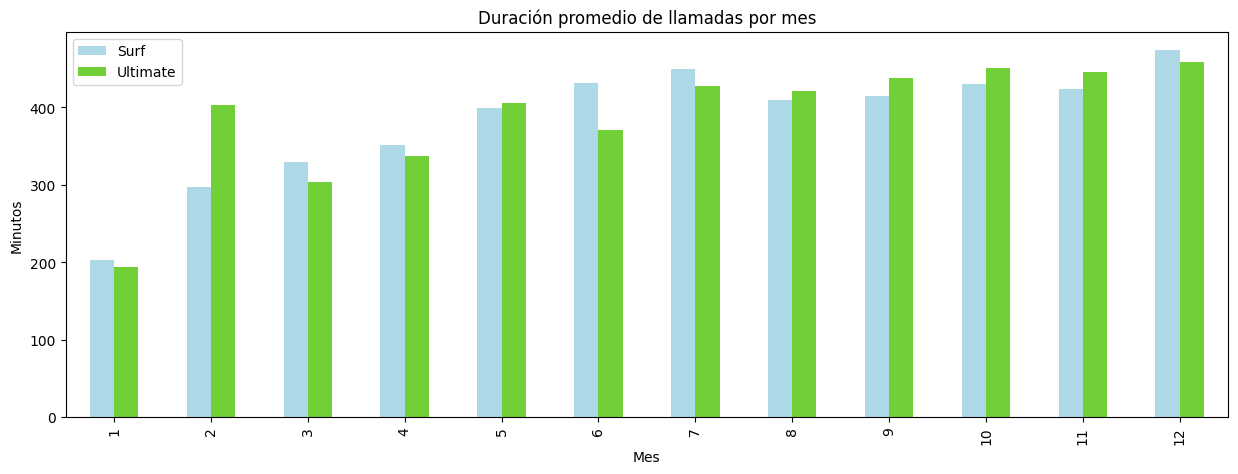

In [ ]:
average_calls_pm = m_total_charges.pivot_table(index= "month", values="duration", columns="plan_name")
average_calls_pm.plot(kind="bar", figsize=[15,5], color=["lightblue","#71D037"], title= "Duración promedio de llamadas por mes", xlabel="Mes", ylabel="Minutos")
plt.legend(["Surf","Ultimate"])
plt.show()

En esta grafica podemos observar un incremento en la duración promedio de las llamadas de los usuarios para ambos planes, teniendo un comportamiento similar en consumo. El promedio mensual de consumo de minutos rebasa los 400 minutos sin llegar a los 500 minutos (limite de consumo para el paquete Surf).

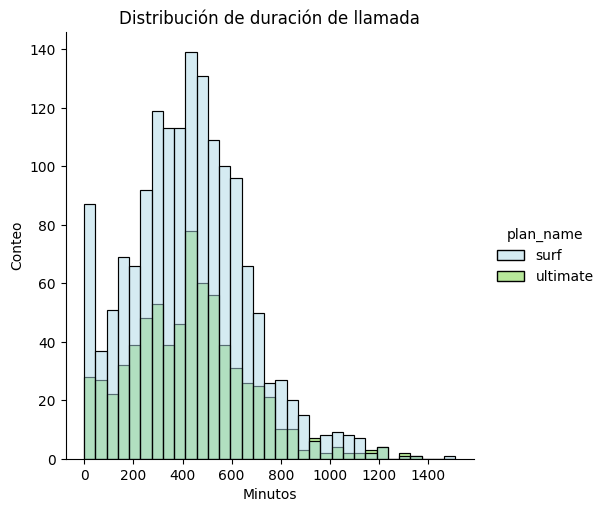

,plan_name,user_id
0,surf,1573
1,ultimate,720


In [ ]:
# m_total_charges.hist(column="duration", by="plan_name", sharey=True, sharex=True)
sns.displot(data=m_total_charges, x="duration", hue="plan_name" , palette={"surf": "lightblue", "ultimate": "#71D037"})
plt.title("Distribución de duración de llamada")
plt.xlabel("Minutos")
plt.ylabel("Conteo")
plt.show()
m_total_charges.groupby("plan_name",observed=False)["user_id"].count().reset_index()

En cuanto a la distribución podemos ver una similitud entre los planes, sin embargo, es notorio que el consumo del plan surf es mucho mayor, esto se debe los usuarios que contrataron este plan superan el número de usuarios únicos del plan últimate (en un 54.22%)

Es importante mencionar que dentro de los consumos mensuales podemos ver dos picos muy significantes, uno en los primeros 20 minutos de consumo y otro dentro del rango de 400 a 420 minutos de consumo

Mientras que podemos ver que una parte de usuarios del plan **Surf** rebasa el límite que cubre su tarifa (500 minutos) , los usuarios del plan **Ultimate** quedan muy por debajo de los 3,000 minutos al mes que pueden consumir.

In [ ]:
#bases de cada plan
surf_user_per_month = m_total_charges[m_total_charges["plan_name"]=="surf"]
ultimate_user_per_month = m_total_charges[m_total_charges["plan_name"]=="ultimate"]

# Calcula la media y la varianza de la duración mensual de llamadas.
def estadisticos (df, column_name):
    mean = np.mean(df[column_name])
    var = np.var(df[column_name],ddof=1)
    std= np.std(df[column_name],ddof=1)
    max= df[column_name].max()
    min= df[column_name].min()

    print(f"promedio={mean} , varianza= {var}  , variacion_std= {std}, max= {max}, min= {min}", end="\n")

estadisticos(surf_user_per_month, "duration")
estadisticos(ultimate_user_per_month,"duration")


promedio=428.7495232040687 , varianza= 54968.27946065038  , variacion_std= 234.4531498202794, max= 1510, min= 0
promedio=430.45 , varianza= 57844.46481223922  , variacion_std= 240.50876244378128, max= 1369, min= 0


Tenemos los siguientes datos:

- El promedio de duracíon de llamadas por mes para el plan de surf fue de 428.8 minutos, mientras que para el plan últimate fue de 430.45
- La varianza del plan surf fue de 54,968, frente a los 57,844 del plan últimate
- La variacion standard del plan surf fue de 234.3 frente a los 240.5 del plan últimate

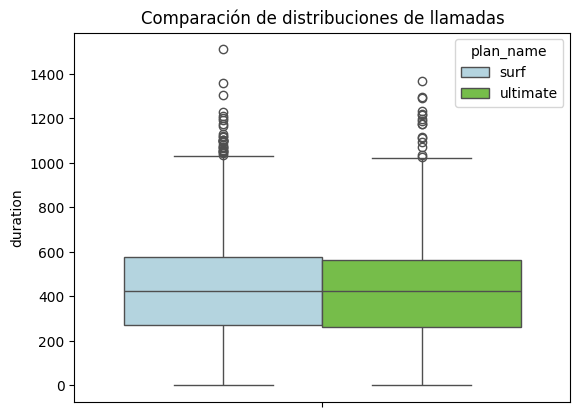

In [ ]:
# Boxplot por plan por mes
# box_df= m_total_charges.pivot_table(index="month",values="duration",columns="plan_name", aggfunc="mean")
# sns.boxplot(box_df, legend=["surf","ultimate"] )

# # Boxplot por plan
sns.boxplot(m_total_charges, y="duration", hue="plan_name"  ,palette={"surf": "lightblue", "ultimate": "#71D037"})
plt.title("Comparación de distribuciones de llamadas")
plt.show()


Tal como lo habiamos observado, en el histograma, existen valores atípicos para ambos gráficos, a su vez podemos observar que su media y sus quartiles son muy similares entre ambos paquetes.

En conclusion parece que los comportamientos son muy similares y presentan una difrencia poco significativa. Sin embargo el plan Surf podría no estar satisfaciendo las necesidades de la mayoría de los usuarios.

### Mensajes

Ahora compararemos el número de mensajes que tienden a enviar cada mes los usuarios de cada plan.

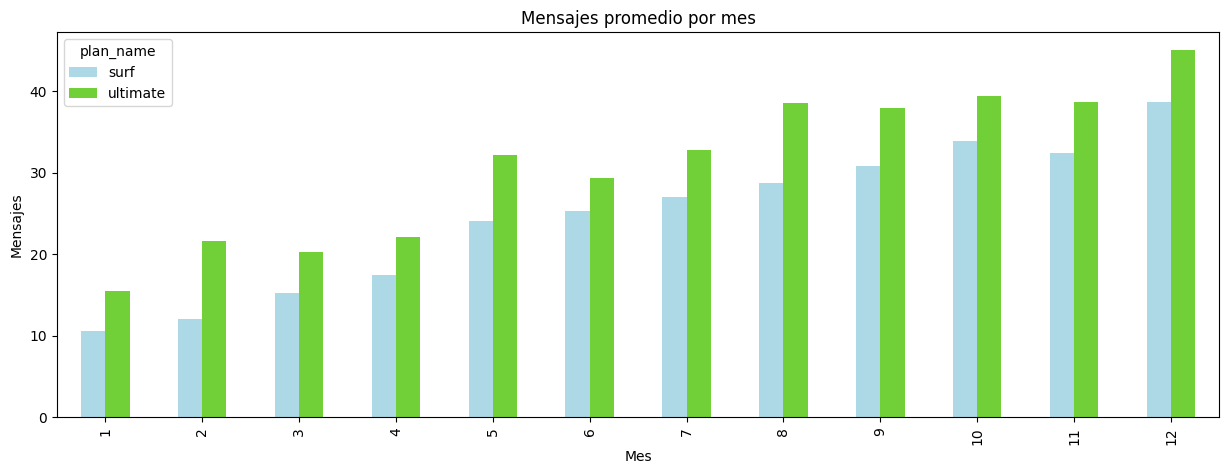

In [ ]:
average_message_pm = m_total_charges.pivot_table(index="month",values="n_messages",columns="plan_name")
average_message_pm.plot(kind="bar", figsize=[15,5], color=["lightblue","#71D037"], title= "Mensajes promedio por mes", xlabel="Mes", ylabel="Mensajes")
plt.show()

En el siguiente gráfico podemos ver un incremento en el número de mensajes enviados mes con mes para cada plan, sin embargo ningúno de los dos grupos sobrepasa los 50 sms(límite para el plan Surf). Podemos ver una tendencia que muestra que los usuarios últimate tienen a enviar mas mensajes en promedio que los usuarios dueños del plan surf.

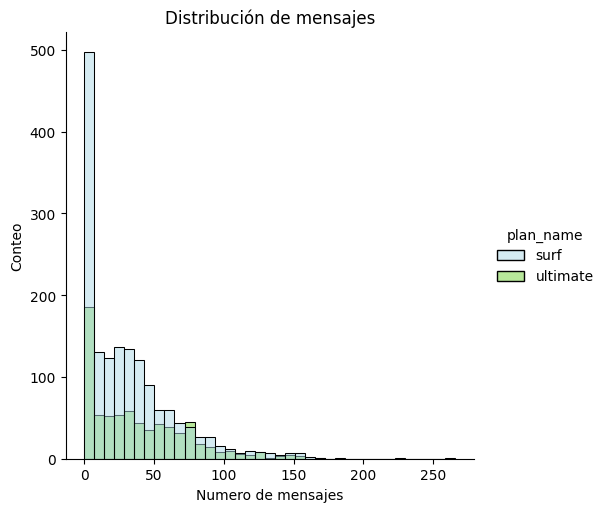

In [ ]:
sns.displot(data=m_total_charges, x="n_messages", hue="plan_name" , palette={"surf": "lightblue", "ultimate": "#71D037"})
plt.title("Distribución de mensajes")
plt.xlabel("Numero de mensajes")
plt.ylabel("Conteo")
plt.show()


# m_total_charges.hist(column="n_messages" ,by="plan_name", bins=10)
# plt.xticks([0,50,100,150])
# plt.show()

De la misma manera que el hisograma anterior, las distribuciones son similares entre los planes. Aquí podemos observar una distribución asimétrica positiva, en el que el rango de 0 a 50 concentra la mayoría de los resultados.

También podemos ver un comoportamiento similar a las llamadas, un porcentaje representativo de los usuarios del plan surf tienen a enviar más mensajes que los establecidos en su tarifa inicial (50 sms)

In [ ]:
#Calculando Varianza, Mediana y Desviación Estandard
estadisticos(surf_user_per_month, "n_messages")
estadisticos(ultimate_user_per_month,"n_messages")

promedio=31.15956770502225 , varianza= 1126.7245219504066  , variacion_std= 33.566717473569064, max= 266, min= 0
promedio=37.55138888888889 , varianza= 1208.756743548138  , variacion_std= 34.76717911404574, max= 166, min= 0


Podemos notar una diferencia poco significativa para los valores promedio, varianza y variación std en los datos

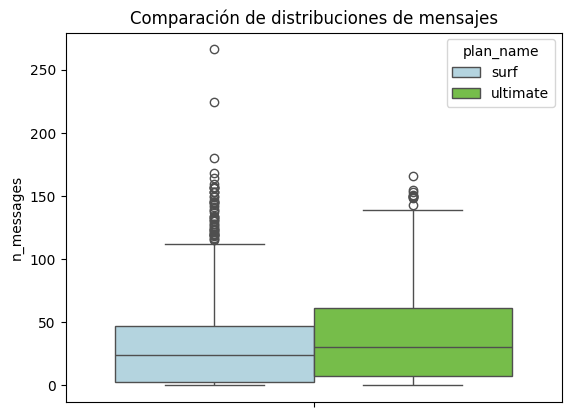

In [ ]:
# Boxplot por plan por mes
# sns.boxplot(average_message_pm, legend=["surf","ultimate"] )

# Boxplot por plan
sns.boxplot(m_total_charges, y="n_messages", hue="plan_name"  ,palette={"surf": "lightblue", "ultimate": "#71D037"})
plt.title("Comparación de distribuciones de mensajes")
plt.show()

El siguiente boxplot nos muestra que a pesar de la similitud de los planes, el paquete surf presenta una gran cantidad de valores atípicos que superan los 100 mensajes, mientras que para el paquete últimate los valores se encuentran por encima de los 120 mensajes

Esta gráfica refuerza el histograma anterior, una parte representativa de usuarios del plan surf, tiende a enviar más de 50 mensajes, lo cúal causará un aumento en su tarifa inicial

### Internet

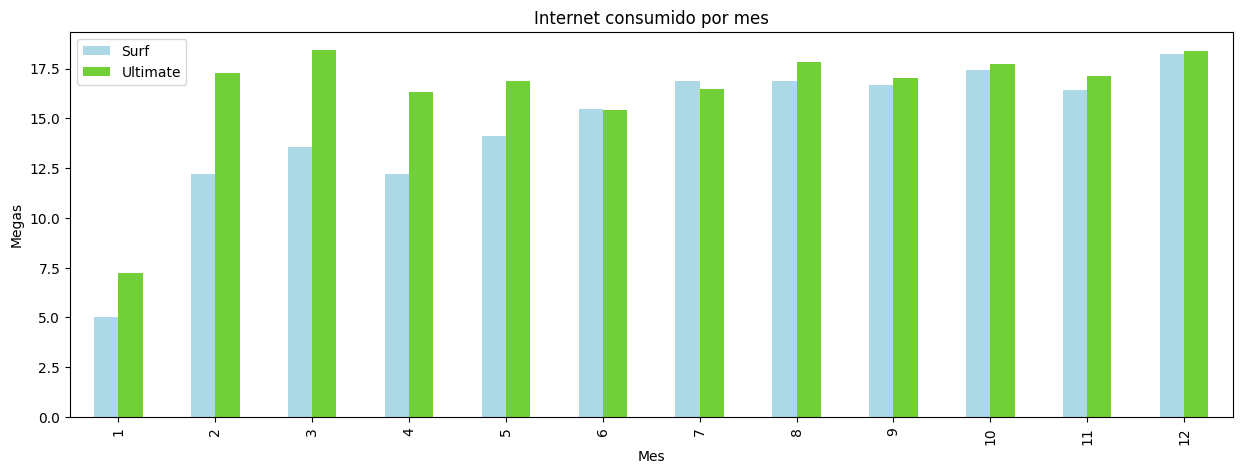

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
average_megas_pm =  m_total_charges.pivot_table(index="month",columns="plan_name",values="megas")
average_megas_pm.plot(kind="bar", figsize=[15,5], color=["lightblue","#71D037"], title= "Internet consumido por mes", xlabel="Mes", ylabel="Megas")
plt.legend(["Surf", "Ultimate"])
plt.show()

El consumo de internet de los usuarios para ambos planes es muy parecido, sin embargo, a partir del segundo semestre los usuarios del plan Surf empiezan a reflejar un consumo promedio mayor al que contrataron (15 Megas). 

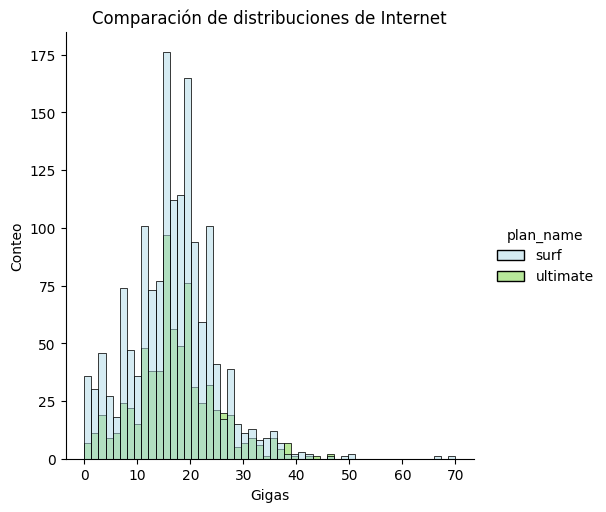

In [ ]:
sns.displot(data=m_total_charges, x="megas", hue="plan_name", palette={"surf": "lightblue", "ultimate": "#71D037"})
plt.title("Comparación de distribuciones de Internet")
plt.xlabel("Gigas")
plt.ylabel("Conteo")
plt.show()

La distribución resulta muy similar en ambos casos, podemos observar valores atipicos para ambos planes.

Para el plan de surf nos encontramos con un límite de 15gb de datos los cuales se superan facilmente en es histograma. Para el caso de el Plan Últimate, al presentar un plan de 30gb de datos, son pocos los usuarios que podemos ver superando este límite.

In [ ]:
#Calculando Varianza, Mediana y Desviación Estandard
estadisticos(surf_user_per_month, "megas")
estadisticos(ultimate_user_per_month,"megas")

promedio=16.670692943420217 , varianza= 61.58359983759012  , variacion_std= 7.847521891501171, max= 70, min= 0
promedio=17.306944444444444 , varianza= 58.830549760469786  , variacion_std= 7.670107545560869, max= 46, min= 0


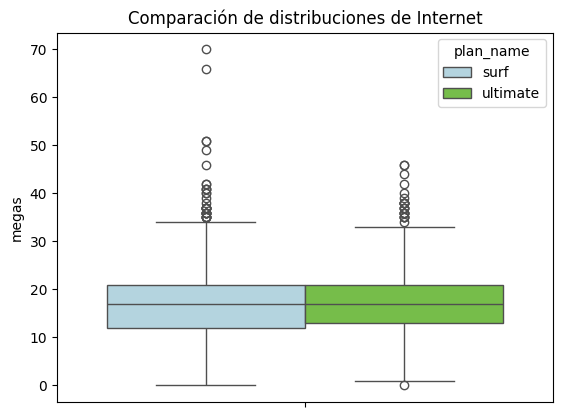

In [ ]:
sns.boxplot(data=m_total_charges, y="megas",hue="plan_name", palette={"surf": "lightblue", "ultimate": "#71D037"})
plt.title("Comparación de distribuciones de Internet")
plt.show()

Para motivos de un mejor detalle detallare cada plan por separado:

- Para el plan Surf: Podemos observar un gran número de valores muy atípicos para este paquete, excediendo los 15 megas y llegando incluso a los 70 para algunos casos. 

- Para el plan Últimate: Podemos observar valores atípicos que llegan hasta los 46 megas.

Es importante revaluar si el plan adquirido cumple con sus necesidades, de lo contrario se podría iniciar un porcentaje de abandono. Analizar a la competencia y los paquetes que ofrecen al mercado nos ayudará a establecer los límites correctos del plan.

## Ingreso

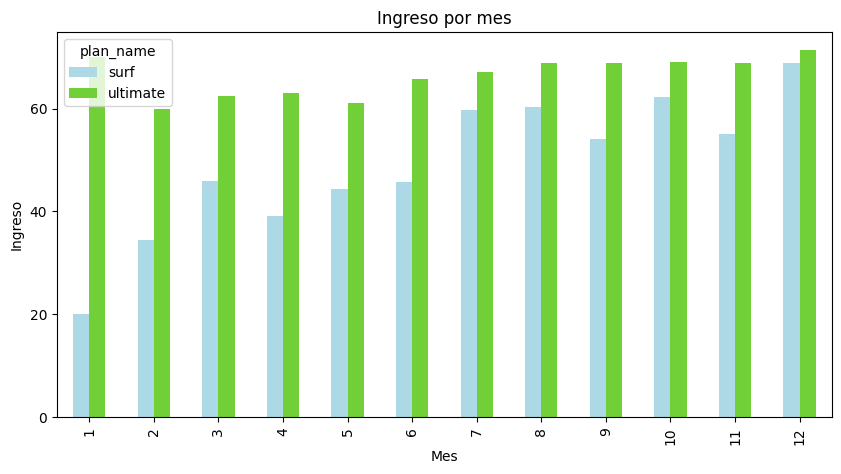

In [ ]:
income_per_user_pm= m_total_charges.pivot_table(values="total_to_pay", columns="plan_name", index="month")

income_per_user_pm.plot(kind="bar", figsize=[10,5], color=["lightblue","#71D037"], title= "Ingreso por mes", xlabel="Mes", ylabel="Ingreso" )
plt.yticks(range(0, int(income_per_user_pm["ultimate"].max()) + 1, 20))  # Reemplaza max_y_value con el valor máximo de tu eje y
plt.show()


A pesar de tener la mitad de usuarios que el plan Surf, el plan últimate generó una mayor derrama economica para la companía. Se puede observar una tendencia continua desde el primer mes hasta el último del periodo 2018. 

Por otra parte, se observa un incremento constante en los ingresos del plan surf, llegando así, a tener una diferencia poco significativa en ingresos para el periodo de diciembre


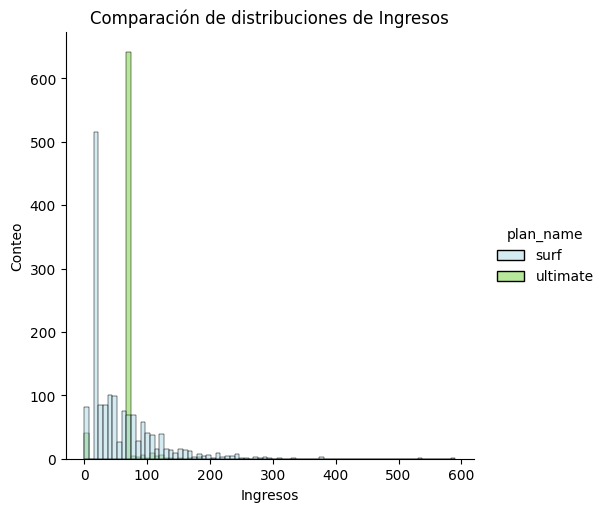

In [ ]:
sns.displot(data=m_total_charges, hue="plan_name" , x="total_to_pay", palette={"surf": "lightblue", "ultimate": "#71D037"})
plt.title("Comparación de distribuciones de Ingresos")
plt.xlabel("Ingresos")
plt.ylabel("Conteo")
plt.show()

El grafico mostrado anteriormente nos muestra que los valores para el plan últimate se encuentran concentrados en su mayoría en el valor $70 (valor del pago mensual de datos). Se pueden observar pocos valores atipicos para ese plan, los cúales consumen un poco más de la tarifa (pagando una comisión mayor).

Para el plan Surf, podemos observar una distribución un poco diferente, si bien la mayoría de sus datos se encuentran en el pago mensual de $20 (valor del plan), es notorio que otra parte de ellos no logran satisfacer su consumo por lo cúal adquieren más datos y terminan recibiendo una tarifa mayor.

In [ ]:
#Calculando Varianza, Mediana y Desviación Estandard
estadisticos(surf_user_per_month, "total_to_pay")
estadisticos(ultimate_user_per_month,"total_to_pay")

promedio=57.828690400508584 , varianza= 3150.1514906502703  , variacion_std= 56.12621037136099, max= 590.37, min= 0.0
promedio=68.39583333333333 , varianza= 404.8931675938804  , variacion_std= 20.12195734996674, max= 182.0, min= 0.0


In [ ]:
sns.boxplot(data=m_total_charges, hue="plan_name" , y="total_to_pay", palette={"surf": "lightblue", "ultimate": "#71D037"} )
plt.title("Comparación de distribuciones de Internet")
plt.show()

NameError: name 'm_total_charges' is not defined

Tal como lo muestra el histograma, la concentracion de valores para el plan últimate se concentra en el valor 70, así como el valor 20 para el plan surf, sin embargo los valores atípicos para el valor surf son demasiados, debe analizarse detalladamente si la cobertura de este plan es funcional para los usuarios.

## Prueba las hipótesis estadísticas

Primera Hipotesis

- Hipotesis Nula: Los ingresos promedio procedentes de los usuarios son iguales para los planes Ultimate y Surf
- Hipotesis Alernativa : Los ingresos promedio procedentes de los usuarios son diferentes para los planes Ultimate y Surf

In [ ]:
# - Hipotesis Nula: Los ingresos promedio procedentes de los usuarios son iguales para los planes Ultimate y Surf
# - Hipotesis Alernativa : Los ingresos promedio procedentes de los usuarios son diferentes para los planes Ultimate y Surf

# alpha= 0.5
# a= income_per_user_pm["surf"]
# b= income_per_user_pm["ultimate"]

# results = st.ttest_ind(a,b, equal_var=False)
# print("valor p :", results)

# if results.pvalue < alpha:
#     print("Se rechaza la hipotesis")
# else: 
#     print("No se puede rechazar la teoría")



m_total_charges
# .pivot_table(index="user_id", columns="plan_name", values="total_to_pay")

NameError: name 'm_total_charges' is not defined

Como podemos observar en el codigo del bloque anterior, la hipotesis es rechazada ya que el p-value se encuentra por debajo de nuestro umbral de aceptación, por lo que es probable que **los ingresos promedio procedentes de los usuarios son diferentes para los planes Ultimate y Surf**

Segunda Hipotesis

- Hipotesis Nula: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones
- Hipotesis Alernativa : El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

Creamos una base incluyendo las ciudades


In [ ]:
city_users_df = m_users[["user_id","city"]].merge(m_total_charges,how="right", on="user_id")
city_users_df.sample(10)

,user_id,city,calls,month,duration,n_messages,megas,plan_name,total_minutes_fee,total_message_fee,total_megas_fee,total_to_pay
711,1154,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",40,11,289,68,18,ultimate,0.00,0.00,0,70.00
1778,1390,"Chicago-Naperville-Elgin, IL-IN-WI MSA",80,8,504,0,17,ultimate,0.00,0.00,0,70.00
827,1176,"New York-Newark-Jersey City, NY-NJ-PA MSA",68,12,432,76,26,surf,0.00,0.78,110,130.78
1657,1363,"Seattle-Tacoma-Bellevue, WA MSA",40,12,262,42,18,ultimate,0.00,0.00,0,70.00
1378,1305,"Los Angeles-Long Beach-Anaheim, CA MSA",62,8,521,4,14,surf,0.63,0.00,0,20.63
1490,1331,"Dallas-Fort Worth-Arlington, TX MSA",53,8,401,88,17,surf,0.00,1.14,20,41.14
326,1071,"New York-Newark-Jersey City, NY-NJ-PA MSA",61,6,358,0,13,surf,0.00,0.00,0,20.00
2092,1461,"Pittsburgh, PA MSA",39,11,308,0,13,surf,0.00,0.00,0,20.00
1991,1435,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",40,12,331,150,26,ultimate,0.00,0.00,0,70.00
1907,1414,"Urban Honolulu, HI MSA",67,10,546,70,25,surf,1.38,0.60,100,121.98


Asignamos una conjunto para la ciudad de ny-nj y otro para las demas ciudades


In [ ]:
ny_nj_df = city_users_df[city_users_df["city"].str.contains("NY-NJ")]
rest_cities_df = city_users_df[~city_users_df["city"].str.contains("NY-NJ")]

In [ ]:
# Evaluamos la hipotesis

alpha = .05
a = rest_cities_df.pivot_table(index="month",  values="total_to_pay") #promedio por mes de ingresos mensuales para otras ciudades por plan
b = ny_nj_df.pivot_table(index="month",  values="total_to_pay") #promedio por mes de ingresos mensuales para ny_nj por plan

results= st.ttest_ind(a,b,equal_var=False)
print(results.pvalue)


def final_result(pvalue):
    if pvalue < alpha:
        print("Se rechaza la hipotesis")
    else: 
        print("No se puede rechazar la teoría")

final_result(results.pvalue)


[0.08300072]
No se puede rechazar la teoría


Tomando en cuenta un umbral del 5% (alpha), no podemos rechazar la hipotesis nula que dice que **El ingreso promedio de los usuarios del área NY-NJ es igual al de la suma de los usuarios de otras regiones**

Parece ser que NY-NJ Trae una gran derrama economica para este producto

Hipotesis extras
- Hipotesis Nula: El ingreso promedio de los usuarios del área NY-NJ para cada plan es igual al de los usuarios de otras regiones
- Hipotesis Alernativa : El ingreso promedio de los usuarios del área NY-NJ para cada plan es diferente al de los usuarios de otras regiones

In [ ]:
# a = rest_cities_df.pivot_table(index="month", columns="plan_name", values="total_to_pay") #promedio por mes de ingresos mensuales para otras ciudades por plan
# b = ny_nj_df.pivot_table(index="month", columns="plan_name", values="total_to_pay") #promedio por mes de ingresos mensuales para ny_nj por plan

# surf_nj = a["surf"]
# ultimate_nj = a["ultimate"]

# surf_other = b["surf"]
# ultimate_other = b["ultimate"].dropna()
# alpha = .01

m_total_charges

NameError: name 'm_total_charges' is not defined

In [ ]:
result_surf = st.ttest_ind(surf_nj,surf_other, equal_var=False)
result_ultimate = st.ttest_ind(ultimate_nj,ultimate_other, equal_var=False)
print(f"pvalue para hipotesis Surf {result_surf.pvalue}, pvalue para hipotesis Ultimate {result_ultimate.pvalue}")

final_result(result_surf.pvalue)
final_result(result_ultimate.pvalue)

pvalue para hipotesis Surf 0.6156742923629447, pvalue para hipotesis Ultimate 0.00018659304139481987
No se puede rechazar la teoría
Se rechaza la hipotesis


Tomando en cuenta un umbral del 1% (alpha) podemos mencionar que:

- No podemos rechazar la hipotesis nula que dice que **El ingreso promedio de los usuarios del área NY-NJ  (para el plan surf) es igual al de los usuarios de otras regiones**
- Se rechaza la hipotesis nula que dice que **El ingreso promedio de los usuarios del área NY-NJ (para el plan últimate) es igual al de los usuarios de otras regiones**


## Conclusión general

- Es importante revaluar si el plan **Surf** cumple con las necesidades del cliente, los gráficos muestran una tendencia a rebasar los limites de la cobertura del plan en mensajes, internet, llamadas y duración, esta tendencia pude llevar a iniciar un porcentaje de abandono o en el mejor de los causos un cambio de plan. Esuchar a los usuarios, analizar a la competencia y los paquetes que ofrecen al mercado nos ayudará a establecer los límites correctos.

- Considerar que existen usuarios que a pesar de su terminación de contrato, continuaron generando costos, valdría la pena preguntar al equipo encargado cuál pudo ser el problema (una mala captura de su salida, o posibles errores en el sistema).